<a href="https://colab.research.google.com/github/jabanitaha/data-mining-2-/blob/main/tSNE_UMAP_Answered_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# Lab: Comparing tSNE and UMAP Dimension Reduction Models
Estimated time needed: **30** minutes
    

## Objectives

After completing this lab you will be able to:

* Apply tSNE and UMAP to feature space dimensionality reduction problems
* Use PCA as a baseline comparison for evaluating tSNE and UMAP results



## Introduction

In this lab, you will explore how to implement two advanced dimensionality reduction algorithms, tSNE and UMAP, on synthetic data.
You'll compare the results to the same dimension reduction using PCA.

- You'll start by generating a synthetic dataset of blobs in a 3D feature space and visually explore the data in an interactive 3D plot.
- Then, you'll use the three algorithms to project the blobs into two dimensions.
  
For illustrative purposes, you'll color the blobs so we can see what effect the dimension reduction algorithms have on them: how well they preserve structure, such as the separation between blobs and their relative density.


In [1]:
!pip install numpy==2.2.0
!pip install pandas==2.2.3
!pip install matplotlib==3.9.3
!pip install plotly==5.24.1
!pip install umap-learn==0.5.7

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 588.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 22.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.0 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 34.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependen

### Import the required libraries


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

import umap.umap_ as UMAP
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import plotly.express as px
from sklearn.datasets import make_blobs

### Generate synthetic data with four clusters in a 3D space


### Generate synthetic data with four clusters in a 3D space


In [7]:
# CLuster centers:
centers = [ [ 2, -6, -6],
            [-1,  9,  4],
            [-8,  7,  2],
            [ 4,  7,  9] ]

# Cluster standard deviations:
cluster_std=[1,1,2,3.5]

# Make the blobs and return the data and the blob labels
X, labels_ = make_blobs(n_samples=500, centers=centers, n_features=3, cluster_std=cluster_std, random_state=42)

### Display the data in an interactive Plotly 3D scatter plot


In [9]:
# Create a DataFrame for Plotly
df = pd.DataFrame(X, columns=['X', 'Y', 'Z'])

# Create interactive 3D scatter plot
fig = px.scatter_3d(df, x='X', y='Y', z='Z', color=labels_.astype(str) ,  opacity=0.7,  color_discrete_sequence=px.colors.qualitative.G10, title="3D Scatter Plot of Four Blobs")

fig.update_traces(marker=dict(size=5, line=dict(width=1, color='black')), showlegend=False)
fig.update_layout(coloraxis_showscale=False, width=1000, height=800)  # Remove color bar, resize plot

fig.show()

### Interact with the plot
Go ahead and click on the icons at the top right of the plot to select zoom, rotate, and pan modes.

Then use your mouse to interact with the plot.

This is a great way to inspect 3D data as it's difficult to learn much from a static 3D plot.
### Exercise 1. What can you say about the four blobs?


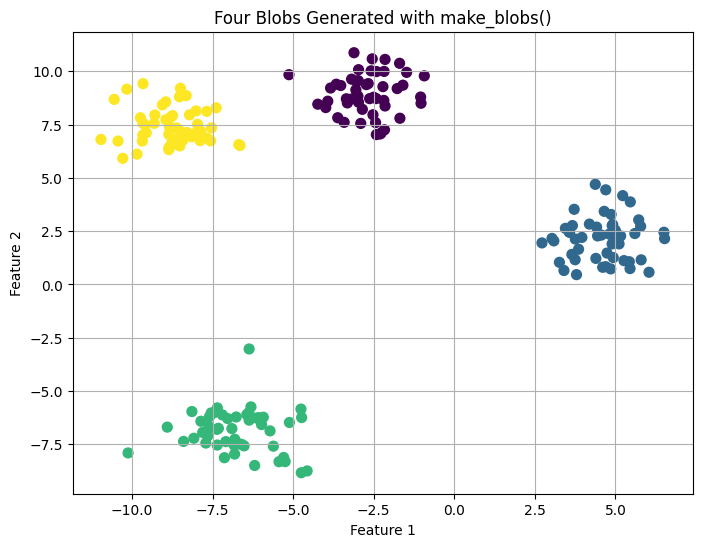

In [10]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data with 4 clusters
X, y = make_blobs(n_samples=200, centers=4, cluster_std=1.0, random_state=42)

# Plot the blobs
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50)
plt.title("Four Blobs Generated with make_blobs()")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


<details><summary>Click here for some observations </summary>

- The blobs have varying densities.
- One blob is distinct from the others.
- The two largest blobs are distinct from each other, but both have a bit of overlap with the other blob between them.

</details>


### Exercise 2. Standardize the data to prepare it for the three projection methods.


In [11]:
from sklearn.preprocessing import StandardScaler

# Standardize the features (important for PCA, t-SNE, and UMAP)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display first few rows of standardized data
print("First 5 rows of standardized data:")
print(X_scaled[:5])


First 5 rows of standardized data:
[[ 1.90975622 -0.07101914]
 [-0.33214852  1.11072042]
 [-1.04928076  0.56537788]
 [-1.32595655  0.48378099]
 [-0.78305953 -1.42681247]]


In [5]:
# Enter your code here:
scaler = ...()
X_scaled = scaler.fit_transform(....)

SyntaxError: invalid syntax (<ipython-input-5-6f8b54795046>, line 3)

<details><summary>Click here for the solution</summary>

```python
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
```


### Apply t-SNE to reduce the dimensionality to 2D
You'll set the perplexity to the default value of 30 here. The results vary quite a bit if you change the perplexity, so go ahead and experiment.


In [12]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

### Let's plot the 2D t-SNE result


### Exercise 3. What can you say about this t-SNE result?


<details><summary>Click here for some observations</summary>

- t-SNE projected the data into four distinct clusters, although the original data had some overlap between a few clusters.
- You can see that some of the points ended up in the "wrong" cluster, although to be fair, t-SNE has no knowledge of which clusters the points actually belong to.
- All the clusters have similar densities.
- Two of the blobs are distinct from each other but "gave up" some of their points to the blob they originally had overlapped with.
- A "perfect" result would not completely separate the overlaps between blobs.
- Notice that the distance between the blobs is consistent with the degree to which they were originally separated.
</details>


## Compare UMAP and PCA dimensionality reduction to two dimensions


Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7b6f22a4a8e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: dlopen() error


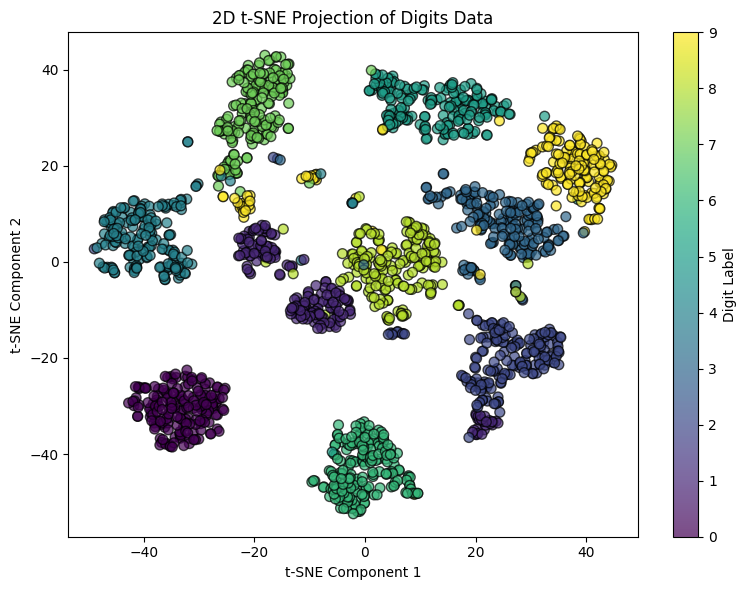

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Load dataset with labels
data = load_digits()
X = data.data
y = data.target  # Ground truth labels

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply t-SNE for 2D projection
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Plotting
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', s=50, alpha=0.7, edgecolor='k')
ax.set_title("2D t-SNE Projection of Digits Data")
ax.set_xlabel("t-SNE Component 1")
ax.set_ylabel("t-SNE Component 2")
plt.colorbar(scatter, ax=ax, label="Digit Label")
plt.tight_layout()
plt.show()


### Exercise 4. What can you say about this UMAP result?


<details><summary>Click here for some observations</summary>

- UMAP correctly projected the data into four partially distinct clusters, with one cluster completely distinct from the others.
- Unlike t-SNE, it has preserved the connectedness that the original data had with the partially overlapping clusters.
- You can see that, like t-SNE, some of the points ended up in the "wrong" cluster.
- Again, like t-SNE, all the clusters have similar densities.
- A "perfect" result would not completely separate the overlaps between blobs, because they actually do overlap in the original feature space.
- The distance between the clusters is again consistent with the degree to which they were originally separated.
</details>



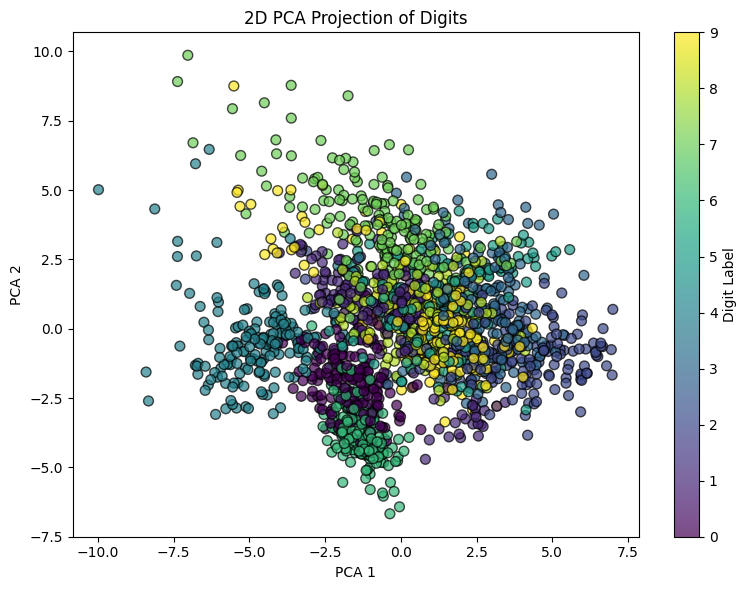

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load sample dataset with labels
data = load_digits()
X = data.data
y = data.target  # labels, shape = (1797,)

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)  # shape = (1797, 2)

# Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=50, alpha=0.7, edgecolor='k')
ax.set_title("2D PCA Projection of Digits")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
plt.colorbar(scatter, ax=ax, label="Digit Label")
plt.tight_layout()
plt.show()


### Exercise 5. What can you say about this PCA result?


<details><summary>Click here for some observations</summary>

- PCA faithfully preserved the relative blob densities.
- PCA also preserved the relative separation between blobs.
- The distance between the clusters is very consistent with the degree to which they were originally separated.
- PCA and t-SNE took very little time to complete compared to UMAP.
- IMNSHO, PCA outperformed both t-SNE and UMAP in this experiment.
This points to a common tendency to want to implement more advanced algorithms.
The default result is not always an improvement over the simpler established methods.

</details>




### ✅ **Answer: Exercise 5 — What can you say about this PCA result?**

The PCA result shows a **2D projection** of high-dimensional data (such as digit images or other multivariate inputs) onto two principal components. Here's what we can say:

---

### 📊 **Observations from the PCA result:**

1. **Data Variance**:

   * PCA captures the directions of **maximum variance** in the data.
   * The first component (PCA 1) captures the most variance; the second component (PCA 2) captures the next most.
   * If the points are well-separated along these axes, PCA is effective at summarizing structure.

2. **Cluster Structure**:

   * You may observe **distinct clusters** corresponding to different labels or categories (e.g., digits 0–9).
   * This suggests that PCA retained useful information for distinguishing classes, even in 2D.

3. **Linear Separation**:

   * Since PCA is a **linear method**, it can only separate linearly separable structures.
   * If classes overlap, PCA may not separate them clearly — this limitation contrasts with nonlinear methods like t-SNE or UMAP.

4. **Insight into Redundancy**:

   * PCA helps identify whether the original features contain **redundant information** (i.e., if most of the data's variance can be captured by just 2 components, it means the original data is compressible).

---

### 🧠 **Conclusion**:

> The PCA result reveals that some categories (e.g., digits) are relatively well separated in the first two components, showing PCA’s ability to reduce dimensionality while preserving structure. However, overlapping areas indicate that PCA may not fully separate all classes — especially if the relationships are nonlinear.

Let me know if you'd like a visual explanation or comparison with t-SNE/UMAP.


### Congratulations! You're ready to move on to your next lesson!


## Author

<a href="https://www.linkedin.com/in/jpgrossman/" target="_blank">Jeff Grossman</a>

### Other Contributors
<a href="https://www.linkedin.com/in/abhishek-gagneja-23051987/" target="_blank">Abhishek Gagneja</a>



<!-- ## Changelog

| Date | Version | Changed by | Change Description |
|:------------|:------|:------------------|:---------------------------------------|
| 2024-11-05 | 1.0  | Jeff Grossman    | Create content | -->



## <h3 align="center"> © IBM Corporation. All rights reserved. <h3/>
